In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


current_folder = os.getcwd()
base_dir = os.path.dirname(current_folder)
print (current_folder)
print(base_dir)



/home/nemos06/Téléchargements/HayRohy
/home/nemos06/Téléchargements


### Chargement des données


In [2]:
marketing_data = pd.read_csv(current_folder +"/generated_data/marketing_dataset.csv")
customers_data = pd.read_csv(current_folder +"/generated_data/customers_dataset.csv")
products_data = pd.read_csv(current_folder +"/generated_data/products_dataset.csv")
sales_data = pd.read_csv(current_folder +"/generated_data/sales_dataset.csv")
print (customers_data.shape)
print (marketing_data.shape)
print (products_data.shape)
print (sales_data.shape)

(3000, 7)
(3000, 8)
(3000, 5)
(3000, 7)


In [3]:
marketing_data.isnull().sum()

Campaign_ID    0
Channel        0
Start_Date     0
End_Date       0
Budget         0
Impressions    0
Clicks         0
Conversions    0
dtype: int64

In [4]:
marketing_data

,Campaign_ID,Channel,Start_Date,End_Date,Budget,Impressions,Clicks,Conversions
0,1,Facebook,2023-06-24,2023-07-03,1311,184941,5544,591
1,2,Billboard,2023-01-19,2023-02-02,2890,70240,99,12
2,3,Online,2023-02-09,2023-03-17,1012,105886,2216,485
3,4,In-Store,2023-08-13,2023-08-22,1284,50538,5323,553
4,5,Online,2023-09-08,2023-10-19,1185,128014,3244,505
...,...,...,...,...,...,...,...,...
2995,2996,Online,2023-07-18,2023-08-26,370,43660,923,180
2996,2997,Online,2023-01-04,2023-01-31,1697,202482,5690,762
2997,2998,Online,2023-02-10,2023-03-01,542,61139,2878,265
2998,2999,Email,2023-08-02,2023-08-09,466,92961,3699,260


In [5]:
customers_data

,Customer_ID,Name,Age,Gender,Location,Join_Date,Total_Spent
0,2001,Nathan,47,Male,Denver,2024-11-24,687.88
1,2002,Isabella,48,Female,Seattle,2023-09-02,1799.09
2,2003,Rachel,30,Female,San Antonio,2024-03-03,470.26
3,2004,Fiona,22,Female,Jacksonville,2024-01-25,144.24
4,2005,Quinn,18,Male,Tucson,2025-02-03,686.13
...,...,...,...,...,...,...,...
2995,4996,Olivia,26,Female,New York,2024-08-09,279.64
2996,4997,Quinn,38,Male,Kansas City,2024-05-17,143.77
2997,4998,Wendy,34,Female,Austin,2024-09-17,70.88
2998,4999,Oliver,34,Male,El Paso,2023-10-28,433.47


In [6]:
sales_data

,Sale_ID,Product_ID,Customer_ID,Date,Quantity,Sale_Price,Channel
0,1,1434,4998,2023-07-11,1,119.65,Phone
1,2,2243,4691,2023-07-21,1,153.64,Mobile App
2,3,1772,4818,2024-01-20,1,89.02,In-Store
3,4,2724,4638,2023-08-21,1,83.08,In-Store
4,5,3034,2003,2023-09-16,1,295.02,Phone
...,...,...,...,...,...,...,...
2995,2996,893,3682,2023-03-27,1,55.53,Mobile App
2996,2997,1919,2008,2023-06-03,2,107.98,Phone
2997,2998,2529,3822,2023-11-21,1,29.13,Mobile App
2998,2999,3089,4019,2023-12-09,1,93.25,In-Store


In [7]:
products_data

,Product_ID,Product_Name,Category,Price,Brand
0,101,Jacket,Outerwear,99.93,TechCorp
1,102,Belt Pro,Accessories,95.56,UrbanStyle
2,103,Book,Media,23.30,StyleBrand
3,104,Jeans Lite,Clothing,53.91,TechCorp
4,105,Camera Lite,Electronics,120.21,QualityPlus
...,...,...,...,...,...
2995,3096,Tablet,Electronics,439.38,TechCorp
2996,3097,Jeans Plus,Clothing,25.22,SportMax
2997,3098,Dress,Clothing,35.14,ElegantLife
2998,3099,Belt,Accessories,36.10,ElegantLife


In [8]:
#marketing_data.isnull().sum()
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer_ID  3000 non-null   int64  
 1   Name         3000 non-null   object 
 2   Age          3000 non-null   int64  
 3   Gender       3000 non-null   object 
 4   Location     3000 non-null   object 
 5   Join_Date    3000 non-null   object 
 6   Total_Spent  3000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 164.2+ KB


### Enjeux Marketing


In [9]:
marketing_data1 = marketing_data.drop(columns=['Campaign_ID'], axis=1)
#changement de format de date 
marketing_data1['Start_Date'] = pd.to_datetime(marketing_data1['Start_Date'])
marketing_data1['End_Date'] = pd.to_datetime(marketing_data1['End_Date'])

# Création de la colonne 'Campaign_Duration' en jours
marketing_data1['Campaign_Duration'] = (marketing_data1['End_Date'] - marketing_data1['Start_Date']).dt.days

marketing_data1


,Channel,Start_Date,End_Date,Budget,Impressions,Clicks,Conversions,Campaign_Duration
0,Facebook,2023-06-24,2023-07-03,1311,184941,5544,591,9
1,Billboard,2023-01-19,2023-02-02,2890,70240,99,12,14
2,Online,2023-02-09,2023-03-17,1012,105886,2216,485,36
3,In-Store,2023-08-13,2023-08-22,1284,50538,5323,553,9
4,Online,2023-09-08,2023-10-19,1185,128014,3244,505,41
...,...,...,...,...,...,...,...,...
2995,Online,2023-07-18,2023-08-26,370,43660,923,180,39
2996,Online,2023-01-04,2023-01-31,1697,202482,5690,762,27
2997,Online,2023-02-10,2023-03-01,542,61139,2878,265,19
2998,Email,2023-08-02,2023-08-09,466,92961,3699,260,7


In [10]:
# Exemple de KPI pour la SWOT(Strengths,Weaknesses,Opportunities,Threats)
marketing_data1['CTR'] = marketing_data1['Clicks'] / marketing_data1['Impressions']  # Impressions:visibilité
marketing_data1['Conversion_Rate'] = marketing_data1['Conversions'] / marketing_data1['Clicks'] #conversion :Nombre d’actions attendues
marketing_data1['CPC'] = marketing_data1['Budget'] / marketing_data1['Clicks']  # Coût par clic
marketing_data1['CPA'] = marketing_data1['Budget'] / marketing_data1['Conversions']  # Coût par acquisition

# KPI quotidiens
marketing_data1['Budget_per_Day'] = marketing_data1['Budget'] / marketing_data1['Campaign_Duration']
marketing_data1['Conversions_per_Day'] = marketing_data1['Conversions'] / marketing_data1['Campaign_Duration']
marketing_data1['Clicks_per_Day'] = marketing_data1['Clicks'] / marketing_data1['Campaign_Duration']
marketing_data1['Impressions_per_Day'] = marketing_data1['Impressions'] / marketing_data1['Campaign_Duration']


# Calcul moyen par canal
summary_by_channel = marketing_data1.groupby('Channel')[
['CTR', 'Conversion_Rate', 'CPC', 'CPA','Campaign_Duration']
].mean().sort_values(
by=['CTR','Conversion_Rate','CPC','CPA'],
ascending=[True,True,True,True])
summary_by_channel

,CTR,Conversion_Rate,CPC,CPA,Campaign_Duration
Channel,,,,,
Billboard,0.001250,0.143803,31.622184,295.380222,25.370968
TV,0.001995,0.154387,11.102668,85.626019,26.663492
Radio,0.003445,0.154775,3.966749,31.001147,26.864111
YouTube,0.020350,0.149978,0.602480,4.826739,26.529210
Social,0.028148,0.149704,0.323319,2.570922,25.889262
Facebook,0.029386,0.145683,0.291885,2.400462,24.780142
Online,0.035638,0.150079,0.303551,2.483838,25.207120
Instagram,0.039828,0.148698,0.253685,2.055111,26.139535
Email,0.054863,0.152014,0.098948,0.784854,27.036304


In [11]:
# Recherche de CTR max et CPA max
channel_max_CTR = summary_by_channel['CTR'].idxmax()
print("Données du Channel avec max CTR :")
print(summary_by_channel.loc[channel_max_CTR])

print("\nDonnées du Channel avec max CPA :")
print(summary_by_channel.loc[channel_max_CTR])


Données du Channel avec max CTR :
CTR                   0.083692
Conversion_Rate       0.144343
CPC                   0.320498
CPA                   2.761930
Campaign_Duration    26.625000
Name: In-Store, dtype: float64

Données du Channel avec max CPA :
CTR                   0.083692
Conversion_Rate       0.144343
CPC                   0.320498
CPA                   2.761930
Campaign_Duration    26.625000
Name: In-Store, dtype: float64


<Axes: xlabel='Channel'>

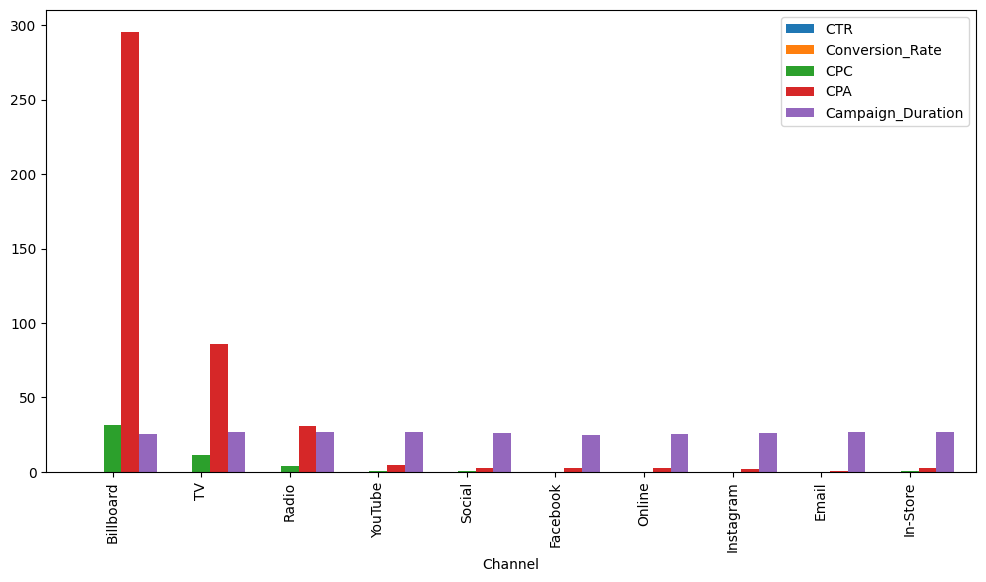

In [12]:
#Signification des indicateurs:
summary_by_channel.plot(kind='bar', figsize=(12, 6), width=1)

In [13]:
summary_by_channel_per_day = marketing_data1.groupby('Channel')[
['Budget_per_Day','Conversions_per_Day','Clicks_per_Day','Impressions_per_Day']
].mean().sort_values(
by=['Budget_per_Day','Conversions_per_Day','Clicks_per_Day','Impressions_per_Day'],
ascending=[True,True,True,True])

<Axes: xlabel='Channel'>

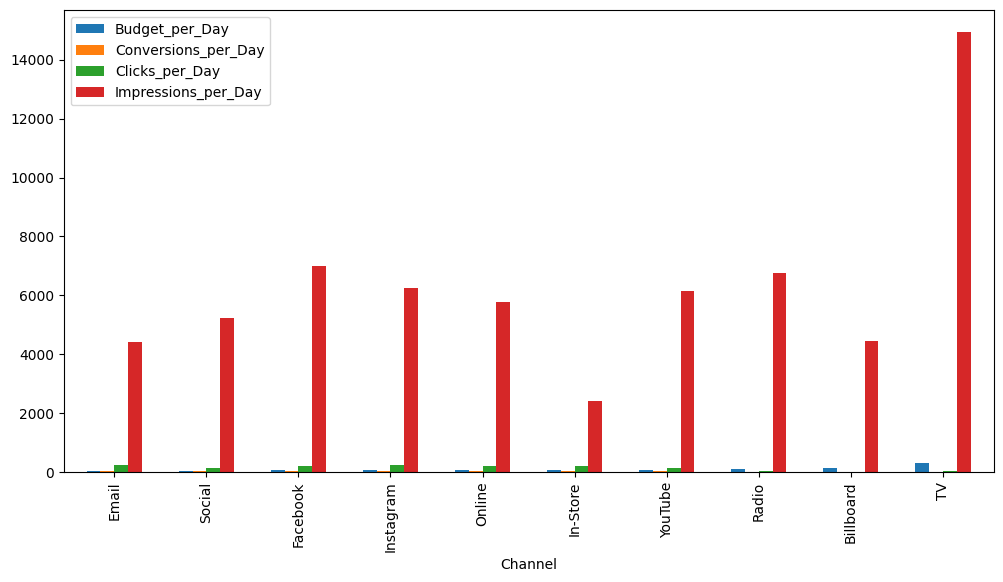

In [14]:
summary_by_channel_per_day.plot(kind='bar', figsize=(12, 6), width=0.6)

In [15]:
customers_data

,Customer_ID,Name,Age,Gender,Location,Join_Date,Total_Spent
0,2001,Nathan,47,Male,Denver,2024-11-24,687.88
1,2002,Isabella,48,Female,Seattle,2023-09-02,1799.09
2,2003,Rachel,30,Female,San Antonio,2024-03-03,470.26
3,2004,Fiona,22,Female,Jacksonville,2024-01-25,144.24
4,2005,Quinn,18,Male,Tucson,2025-02-03,686.13
...,...,...,...,...,...,...,...
2995,4996,Olivia,26,Female,New York,2024-08-09,279.64
2996,4997,Quinn,38,Male,Kansas City,2024-05-17,143.77
2997,4998,Wendy,34,Female,Austin,2024-09-17,70.88
2998,4999,Oliver,34,Male,El Paso,2023-10-28,433.47


In [16]:
products_data

,Product_ID,Product_Name,Category,Price,Brand
0,101,Jacket,Outerwear,99.93,TechCorp
1,102,Belt Pro,Accessories,95.56,UrbanStyle
2,103,Book,Media,23.30,StyleBrand
3,104,Jeans Lite,Clothing,53.91,TechCorp
4,105,Camera Lite,Electronics,120.21,QualityPlus
...,...,...,...,...,...
2995,3096,Tablet,Electronics,439.38,TechCorp
2996,3097,Jeans Plus,Clothing,25.22,SportMax
2997,3098,Dress,Clothing,35.14,ElegantLife
2998,3099,Belt,Accessories,36.10,ElegantLife


In [17]:
products_data.drop('Product_ID',axis=1)

,Product_Name,Category,Price,Brand
0,Jacket,Outerwear,99.93,TechCorp
1,Belt Pro,Accessories,95.56,UrbanStyle
2,Book,Media,23.30,StyleBrand
3,Jeans Lite,Clothing,53.91,TechCorp
4,Camera Lite,Electronics,120.21,QualityPlus
...,...,...,...,...
2995,Tablet,Electronics,439.38,TechCorp
2996,Jeans Plus,Clothing,25.22,SportMax
2997,Dress,Clothing,35.14,ElegantLife
2998,Belt,Accessories,36.10,ElegantLife


In [18]:
sales_data

,Sale_ID,Product_ID,Customer_ID,Date,Quantity,Sale_Price,Channel
0,1,1434,4998,2023-07-11,1,119.65,Phone
1,2,2243,4691,2023-07-21,1,153.64,Mobile App
2,3,1772,4818,2024-01-20,1,89.02,In-Store
3,4,2724,4638,2023-08-21,1,83.08,In-Store
4,5,3034,2003,2023-09-16,1,295.02,Phone
...,...,...,...,...,...,...,...
2995,2996,893,3682,2023-03-27,1,55.53,Mobile App
2996,2997,1919,2008,2023-06-03,2,107.98,Phone
2997,2998,2529,3822,2023-11-21,1,29.13,Mobile App
2998,2999,3089,4019,2023-12-09,1,93.25,In-Store


In [19]:
sales_data.shape

(3000, 7)

In [20]:
products_data.shape

(3000, 5)

In [21]:
# Fusion des csv
merged_data = pd.merge(sales_data,products_data, on="Product_ID", how="left")
merged_data

,Sale_ID,Product_ID,Customer_ID,Date,Quantity,Sale_Price,Channel,Product_Name,Category,Price,Brand
0,1,1434,4998,2023-07-11,1,119.65,Phone,Backpack,Bags,119.65,ElegantLife
1,2,2243,4691,2023-07-21,1,153.64,Mobile App,Jacket Mini,Outerwear,153.64,ModernTech
2,3,1772,4818,2024-01-20,1,89.02,In-Store,Belt,Accessories,89.02,ComfortWear
3,4,2724,4638,2023-08-21,1,83.08,In-Store,Hat Mini,Accessories,91.89,StyleBrand
4,5,3034,2003,2023-09-16,1,295.02,Phone,Phone Plus,Electronics,295.02,ClassicBrand
...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,893,3682,2023-03-27,1,55.53,Mobile App,Socks,Accessories,55.53,ModernTech
2996,2997,1919,2008,2023-06-03,2,107.98,Phone,Jewelry Pro,Accessories,66.22,QualityPlus
2997,2998,2529,3822,2023-11-21,1,29.13,Mobile App,Perfume Plus,Beauty,29.13,SportMax
2998,2999,3089,4019,2023-12-09,1,93.25,In-Store,Backpack,Bags,93.25,QualityPlus


In [22]:
merged_data.isnull().sum ()

Sale_ID         0
Product_ID      0
Customer_ID     0
Date            0
Quantity        0
Sale_Price      0
Channel         0
Product_Name    0
Category        0
Price           0
Brand           0
dtype: int64

In [23]:
concat_data = pd.concat([customers_data,   merged_data], axis=1)
concat_dat = concat_data.drop(columns=['Product_ID','Customer_ID'],axis=1)
concat_dat

,Name,Age,Gender,Location,Join_Date,Total_Spent,Sale_ID,Date,Quantity,Sale_Price,Channel,Product_Name,Category,Price,Brand
0,Nathan,47,Male,Denver,2024-11-24,687.88,1,2023-07-11,1,119.65,Phone,Backpack,Bags,119.65,ElegantLife
1,Isabella,48,Female,Seattle,2023-09-02,1799.09,2,2023-07-21,1,153.64,Mobile App,Jacket Mini,Outerwear,153.64,ModernTech
2,Rachel,30,Female,San Antonio,2024-03-03,470.26,3,2024-01-20,1,89.02,In-Store,Belt,Accessories,89.02,ComfortWear
3,Fiona,22,Female,Jacksonville,2024-01-25,144.24,4,2023-08-21,1,83.08,In-Store,Hat Mini,Accessories,91.89,StyleBrand
4,Quinn,18,Male,Tucson,2025-02-03,686.13,5,2023-09-16,1,295.02,Phone,Phone Plus,Electronics,295.02,ClassicBrand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Olivia,26,Female,New York,2024-08-09,279.64,2996,2023-03-27,1,55.53,Mobile App,Socks,Accessories,55.53,ModernTech
2996,Quinn,38,Male,Kansas City,2024-05-17,143.77,2997,2023-06-03,2,107.98,Phone,Jewelry Pro,Accessories,66.22,QualityPlus
2997,Wendy,34,Female,Austin,2024-09-17,70.88,2998,2023-11-21,1,29.13,Mobile App,Perfume Plus,Beauty,29.13,SportMax
2998,Oliver,34,Male,El Paso,2023-10-28,433.47,2999,2023-12-09,1,93.25,In-Store,Backpack,Bags,93.25,QualityPlus


In [24]:
data = concat_dat.copy()
data = data.drop(columns=['Date','Product_Name','Sale_Price','Sale_ID'],axis=1)
data

,Name,Age,Gender,Location,Join_Date,Total_Spent,Quantity,Channel,Category,Price,Brand
0,Nathan,47,Male,Denver,2024-11-24,687.88,1,Phone,Bags,119.65,ElegantLife
1,Isabella,48,Female,Seattle,2023-09-02,1799.09,1,Mobile App,Outerwear,153.64,ModernTech
2,Rachel,30,Female,San Antonio,2024-03-03,470.26,1,In-Store,Accessories,89.02,ComfortWear
3,Fiona,22,Female,Jacksonville,2024-01-25,144.24,1,In-Store,Accessories,91.89,StyleBrand
4,Quinn,18,Male,Tucson,2025-02-03,686.13,1,Phone,Electronics,295.02,ClassicBrand
...,...,...,...,...,...,...,...,...,...,...,...
2995,Olivia,26,Female,New York,2024-08-09,279.64,1,Mobile App,Accessories,55.53,ModernTech
2996,Quinn,38,Male,Kansas City,2024-05-17,143.77,2,Phone,Accessories,66.22,QualityPlus
2997,Wendy,34,Female,Austin,2024-09-17,70.88,1,Mobile App,Beauty,29.13,SportMax
2998,Oliver,34,Male,El Paso,2023-10-28,433.47,1,In-Store,Bags,93.25,QualityPlus


### Exploration des données ensemble


In [25]:
df = data[['Name','Age','Gender','Location','Join_Date','Total_Spent','Quantity','Channel','Category','Brand']].copy()
df_Avg_Price = df['Total_Spent'] / df['Quantity']
df['Avg_Price'] = df_Avg_Price
df


,Name,Age,Gender,Location,Join_Date,Total_Spent,Quantity,Channel,Category,Brand,Avg_Price
0,Nathan,47,Male,Denver,2024-11-24,687.88,1,Phone,Bags,ElegantLife,687.880
1,Isabella,48,Female,Seattle,2023-09-02,1799.09,1,Mobile App,Outerwear,ModernTech,1799.090
2,Rachel,30,Female,San Antonio,2024-03-03,470.26,1,In-Store,Accessories,ComfortWear,470.260
3,Fiona,22,Female,Jacksonville,2024-01-25,144.24,1,In-Store,Accessories,StyleBrand,144.240
4,Quinn,18,Male,Tucson,2025-02-03,686.13,1,Phone,Electronics,ClassicBrand,686.130
...,...,...,...,...,...,...,...,...,...,...,...
2995,Olivia,26,Female,New York,2024-08-09,279.64,1,Mobile App,Accessories,ModernTech,279.640
2996,Quinn,38,Male,Kansas City,2024-05-17,143.77,2,Phone,Accessories,QualityPlus,71.885
2997,Wendy,34,Female,Austin,2024-09-17,70.88,1,Mobile App,Beauty,SportMax,70.880
2998,Oliver,34,Male,El Paso,2023-10-28,433.47,1,In-Store,Bags,QualityPlus,433.470


In [26]:
df.isnull().sum()

Name           0
Age            0
Gender         0
Location       0
Join_Date      0
Total_Spent    0
Quantity       0
Channel        0
Category       0
Brand          0
Avg_Price      0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         3000 non-null   object 
 1   Age          3000 non-null   int64  
 2   Gender       3000 non-null   object 
 3   Location     3000 non-null   object 
 4   Join_Date    3000 non-null   object 
 5   Total_Spent  3000 non-null   float64
 6   Quantity     3000 non-null   int64  
 7   Channel      3000 non-null   object 
 8   Category     3000 non-null   object 
 9   Brand        3000 non-null   object 
 10  Avg_Price    3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


### Division de df en deux sous groupes


In [28]:
data_cat = []
data_num = []
for i,c in zip(df.dtypes,df.columns):
    if i == object:
        data_cat.append(c)
    else:
        data_num.append(c)
data_cat = df[data_cat]
data_num = df[data_num]
		

In [29]:
data_num

,Age,Total_Spent,Quantity,Avg_Price
0,47,687.88,1,687.880
1,48,1799.09,1,1799.090
2,30,470.26,1,470.260
3,22,144.24,1,144.240
4,18,686.13,1,686.130
...,...,...,...,...
2995,26,279.64,1,279.640
2996,38,143.77,2,71.885
2997,34,70.88,1,70.880
2998,34,433.47,1,433.470


In [30]:
data_cat

,Name,Gender,Location,Join_Date,Channel,Category,Brand
0,Nathan,Male,Denver,2024-11-24,Phone,Bags,ElegantLife
1,Isabella,Female,Seattle,2023-09-02,Mobile App,Outerwear,ModernTech
2,Rachel,Female,San Antonio,2024-03-03,In-Store,Accessories,ComfortWear
3,Fiona,Female,Jacksonville,2024-01-25,In-Store,Accessories,StyleBrand
4,Quinn,Male,Tucson,2025-02-03,Phone,Electronics,ClassicBrand
...,...,...,...,...,...,...,...
2995,Olivia,Female,New York,2024-08-09,Mobile App,Accessories,ModernTech
2996,Quinn,Male,Kansas City,2024-05-17,Phone,Accessories,QualityPlus
2997,Wendy,Female,Austin,2024-09-17,Mobile App,Beauty,SportMax
2998,Oliver,Male,El Paso,2023-10-28,In-Store,Bags,QualityPlus


### Data pour la segmentation des clients


In [31]:
df

,Name,Age,Gender,Location,Join_Date,Total_Spent,Quantity,Channel,Category,Brand,Avg_Price
0,Nathan,47,Male,Denver,2024-11-24,687.88,1,Phone,Bags,ElegantLife,687.880
1,Isabella,48,Female,Seattle,2023-09-02,1799.09,1,Mobile App,Outerwear,ModernTech,1799.090
2,Rachel,30,Female,San Antonio,2024-03-03,470.26,1,In-Store,Accessories,ComfortWear,470.260
3,Fiona,22,Female,Jacksonville,2024-01-25,144.24,1,In-Store,Accessories,StyleBrand,144.240
4,Quinn,18,Male,Tucson,2025-02-03,686.13,1,Phone,Electronics,ClassicBrand,686.130
...,...,...,...,...,...,...,...,...,...,...,...
2995,Olivia,26,Female,New York,2024-08-09,279.64,1,Mobile App,Accessories,ModernTech,279.640
2996,Quinn,38,Male,Kansas City,2024-05-17,143.77,2,Phone,Accessories,QualityPlus,71.885
2997,Wendy,34,Female,Austin,2024-09-17,70.88,1,Mobile App,Beauty,SportMax,70.880
2998,Oliver,34,Male,El Paso,2023-10-28,433.47,1,In-Store,Bags,QualityPlus,433.470


In [32]:
# 1. Colonnes numériques et catégorielles
num_features = ['Age', 'Total_Spent', 'Quantity','Avg_Price']
cat_features = ['Gender','Location','Channel', 'Category', 'Brand']

# 2. Préprocesseurs
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# 3. Pipeline de prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# 4. Pipeline complet avec KMeans (k = 4)
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('clustering', KMeans(n_clusters=5, random_state=42))
])

# 5. Chargement des données
df = df.copy()

# 6. Appliquer le pipeline
pipeline.fit(df)

# 7. Ajouter les clusters au DataFrame
df['Cluster'] = pipeline.named_steps['clustering'].labels_

# 8. Visualiser
print(df[['Name', 'Age', 'Total_Spent', 'Cluster']].head(10))


       Name  Age  Total_Spent  Cluster
0    Nathan   47       687.88        0
1  Isabella   48      1799.09        3
2    Rachel   30       470.26        1
3     Fiona   22       144.24        1
4     Quinn   18       686.13        0
5     Bella   26       317.52        1
6    Thomas   28        59.37        1
7    George   29       386.84        1
8       Zoe   36       616.93        2
9     Isaac   20       593.59        1


In [33]:
df['Cluster'].value_counts(ascending=True)

Cluster
3    145
0    547
2    687
4    731
1    890
Name: count, dtype: int64

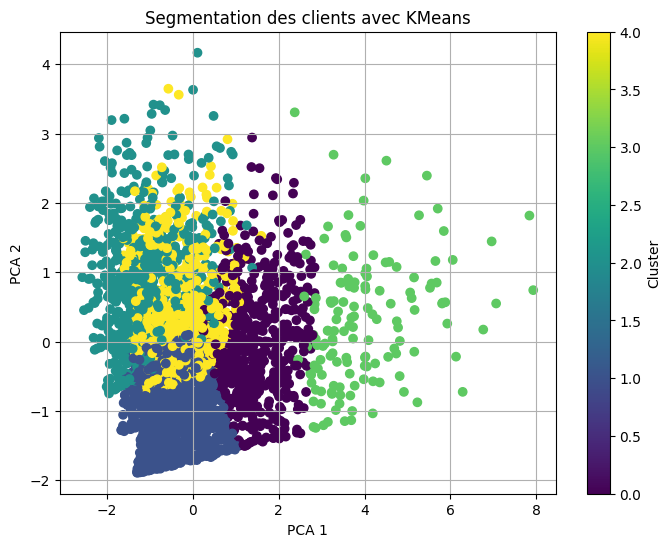

In [34]:
# Extraire les données après prétraitement
X_processed = pipeline.named_steps['preprocessing'].transform(df)

# Réduire en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Tracer
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='viridis')
plt.title('Segmentation des clients avec KMeans')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


### Resultat pour la segmentation des clients


In [35]:
df['Cluster'].value_counts(ascending=True)

Cluster
3    145
0    547
2    687
4    731
1    890
Name: count, dtype: int64

### Groupe_0


In [36]:
# Filtrer les clients du cluster 0
clients_cluster_0 = df[df['Cluster'] == 0]['Name'].unique()
print(clients_cluster_0)
#print("La somme des clients dans le groupe 0 est ",clients_cluster_0.count())
clients_cluster_0_avg_age = df[df['Cluster'] == 0]['Age'].mean()
print(f"La moyenne d'age pour le groupe 0 est :{clients_cluster_0_avg_age} Ans")
clients_cluster_0_avg_Total_Spent = df[df['Cluster'] == 0]['Total_Spent'].mean()
print(f"La moyenne de dépense pour le groupe 0 est: {clients_cluster_0_avg_Total_Spent} $")
clients_cluster_0_max_Total_Spent = df[df['Cluster'] == 0]['Total_Spent'].max()
print(f"La dépense maximale pour le groupe 0 est: {clients_cluster_0_max_Total_Spent} $")

['Nathan' 'Quinn' 'Rachel' 'Henry' 'Penny' 'George' 'William' 'Maria'
 'Christopher' 'Katherine' 'Kevin' 'Patrick' 'Robert' 'Victoria' 'James'
 'Isabella' 'Julia' 'Liam' 'Fiona' 'Hannah' 'Thomas' 'Tina' 'Frank'
 'Charlotte' 'Victor' 'Benjamin' 'David' 'Wendy' 'Bella' 'Diana' 'Nina'
 'Sophia' 'Olivia' 'Grace' 'Alexander' 'Ethan' 'Marcus' 'Samuel' 'Alice'
 'Luna' 'Isaac' 'Zoe' 'Emma' 'Oliver']
La moyenne d'age pour le groupe 0 est :36.31444241316271 Ans
La moyenne de dépense pour le groupe 0 est: 799.6155758683728 $
La dépense maximale pour le groupe 0 est: 1586.05 $


### Groupe_1


In [37]:
# Filtrer les clients du cluster 1
clients_cluster_1 = df[df['Cluster'] == 1]['Name'].unique()
print(clients_cluster_1)
#print("La somme des clients dans le groupe 0 est ",clients_cluster_0.count())
clients_cluster_1_avg_age = df[df['Cluster'] == 1]['Age'].mean()
print(f"La moyenne d'age pour le groupe 1 est :{clients_cluster_1_avg_age} Ans")
clients_cluster_1_avg_Total_Spent = df[df['Cluster'] == 1]['Total_Spent'].mean()
print(f"La moyenne de dépense pour le groupe 1 est: {clients_cluster_1_avg_Total_Spent} $")
clients_cluster_1_max_Total_Spent = df[df['Cluster'] == 1]['Total_Spent'].max()
print(f"La dépense maximale pour le groupe 1 est: {clients_cluster_1_max_Total_Spent} $")

['Rachel' 'Fiona' 'Bella' 'Thomas' 'George' 'Isaac' 'Patrick' 'Nathan'
 'Charlotte' 'Marcus' 'Christopher' 'Nina' 'Tina' 'Benjamin' 'Hannah'
 'Samuel' 'Quinn' 'Emma' 'Alice' 'Robert' 'Grace' 'Liam' 'Diana' 'James'
 'Isabella' 'Henry' 'Julia' 'Zoe' 'Wendy' 'Alexander' 'Oliver' 'Luna'
 'William' 'David' 'Victoria' 'Olivia' 'Penny' 'Ethan' 'Frank' 'Victor'
 'Kevin' 'Sophia' 'Katherine' 'Maria']
La moyenne d'age pour le groupe 1 est :25.542696629213484 Ans
La moyenne de dépense pour le groupe 1 est: 309.2967752808989 $
La dépense maximale pour le groupe 1 est: 798.25 $


### Groupe_2


In [38]:
# Filtrer les clients du cluster 2
clients_cluster_2 = df[df['Cluster'] == 2]['Name'].unique()
print(clients_cluster_2)
clients_cluster_2_avg_age = df[df['Cluster'] == 2]['Age'].mean()
print(f"La moyenne d'age pour le groupe 2 est :{clients_cluster_2_avg_age} Ans")
clients_cluster_2_avg_Total_Spent = df[df['Cluster'] == 2]['Total_Spent'].mean()
print(f"La moyenne de dépense pour le groupe 2 est: {clients_cluster_2_avg_Total_Spent} $")
clients_cluster_2_max_Total_Spent = df[df['Cluster'] == 2]['Total_Spent'].max()
print(f"La dépense maximale pour le groupe 2 est: {clients_cluster_2_max_Total_Spent} $")

['Zoe' 'Penny' 'Marcus' 'Bella' 'Fiona' 'Nina' 'Thomas' 'Christopher'
 'Henry' 'Victoria' 'David' 'George' 'Victor' 'Tina' 'Hannah' 'Olivia'
 'Isaac' 'Benjamin' 'Maria' 'Alexander' 'Alice' 'Rachel' 'Liam' 'Luna'
 'Sophia' 'Robert' 'Isabella' 'James' 'Emma' 'Nathan' 'Ethan' 'Samuel'
 'Katherine' 'Frank' 'Kevin' 'William' 'Patrick' 'Diana' 'Quinn' 'Julia'
 'Charlotte' 'Grace' 'Wendy' 'Oliver']
La moyenne d'age pour le groupe 2 est :32.3901018922853 Ans
La moyenne de dépense pour le groupe 2 est: 439.9292721979621 $
La dépense maximale pour le groupe 2 est: 1649.01 $


### Groupe_3


In [39]:
# Filtrer les clients du cluster 3
clients_cluster_3 = df[df['Cluster'] == 3]['Name'].unique()
print(clients_cluster_3)
clients_cluster_3_avg_age = df[df['Cluster'] == 3]['Age'].mean()
print(f"La moyenne d'age pour le groupe 3 est :{clients_cluster_3_avg_age} Ans")
clients_cluster_3_avg_Total_Spent = df[df['Cluster'] == 3]['Total_Spent'].mean()
print(f"La moyenne de dépense pour le groupe 3 est: {clients_cluster_3_avg_Total_Spent} $")
clients_cluster_3_max_Total_Spent = df[df['Cluster'] == 3]['Total_Spent'].max()
print(f"La dépense maximale pour le groupe 3 est: {clients_cluster_3_max_Total_Spent} $")

['Isabella' 'Luna' 'Victoria' 'Victor' 'David' 'Fiona' 'Ethan' 'Rachel'
 'Julia' 'Sophia' 'Nathan' 'George' 'William' 'Henry' 'Charlotte' 'James'
 'Nina' 'Robert' 'Oliver' 'Kevin' 'Benjamin' 'Hannah' 'Liam' 'Christopher'
 'Grace' 'Marcus' 'Katherine' 'Isaac' 'Wendy' 'Quinn' 'Olivia' 'Alexander'
 'Diana' 'Alice' 'Samuel' 'Maria' 'Tina' 'Frank' 'Emma' 'Zoe' 'Bella'
 'Penny']
La moyenne d'age pour le groupe 3 est :37.324137931034485 Ans
La moyenne de dépense pour le groupe 3 est: 1378.5082758620688 $
La dépense maximale pour le groupe 3 est: 2521.08 $


### Groupe_4


In [40]:
# Filtrer les clients du cluster 4
clients_cluster_4 = df[df['Cluster'] == 4]['Name'].unique()
print(clients_cluster_4)
clients_cluster_4_avg_age = df[df['Cluster'] == 4]['Age'].mean()
print(f"La moyenne d'age pour le groupe 4 est :{clients_cluster_4_avg_age} Ans")
clients_cluster_4_avg_Total_Spent = df[df['Cluster'] == 4]['Total_Spent'].mean()
print(f"La moyenne de dépense pour le groupe 4 est: {clients_cluster_4_avg_Total_Spent} $")
clients_cluster_4_max_Total_Spent = df[df['Cluster'] == 4]['Total_Spent'].max()
print(f"La dépense maximale pour le groupe 4 est: {clients_cluster_4_max_Total_Spent} $")

['Tina' 'Maria' 'Isabella' 'Nina' 'Isaac' 'David' 'Diana' 'Kevin'
 'Katherine' 'Robert' 'Liam' 'Nathan' 'Alexander' 'Luna' 'Christopher'
 'Victoria' 'Frank' 'Quinn' 'Oliver' 'Benjamin' 'Rachel' 'Emma' 'Zoe'
 'Henry' 'Sophia' 'Alice' 'Charlotte' 'Penny' 'Samuel' 'Ethan' 'Olivia'
 'James' 'Patrick' 'Victor' 'George' 'Hannah' 'Bella' 'Wendy' 'Thomas'
 'Fiona' 'Julia' 'Marcus' 'William' 'Grace']
La moyenne d'age pour le groupe 4 est :45.2749658002736 Ans
La moyenne de dépense pour le groupe 4 est: 311.480123119015 $
La dépense maximale pour le groupe 4 est: 978.23 $


In [42]:
df

,Name,Age,Gender,Location,Join_Date,Total_Spent,Quantity,Channel,Category,Brand,Avg_Price,Cluster
0,Nathan,47,Male,Denver,2024-11-24,687.88,1,Phone,Bags,ElegantLife,687.880,0
1,Isabella,48,Female,Seattle,2023-09-02,1799.09,1,Mobile App,Outerwear,ModernTech,1799.090,3
2,Rachel,30,Female,San Antonio,2024-03-03,470.26,1,In-Store,Accessories,ComfortWear,470.260,1
3,Fiona,22,Female,Jacksonville,2024-01-25,144.24,1,In-Store,Accessories,StyleBrand,144.240,1
4,Quinn,18,Male,Tucson,2025-02-03,686.13,1,Phone,Electronics,ClassicBrand,686.130,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Olivia,26,Female,New York,2024-08-09,279.64,1,Mobile App,Accessories,ModernTech,279.640,1
2996,Quinn,38,Male,Kansas City,2024-05-17,143.77,2,Phone,Accessories,QualityPlus,71.885,4
2997,Wendy,34,Female,Austin,2024-09-17,70.88,1,Mobile App,Beauty,SportMax,70.880,1
2998,Oliver,34,Male,El Paso,2023-10-28,433.47,1,In-Store,Bags,QualityPlus,433.470,1


In [43]:
# df[['Total_Spent','Quantity']]

#### Modelisation preprocessing


In [44]:
df['fidelity_score_raw'] = (df['Total_Spent'] * 0.7) + (df['Quantity'] * 100 * 0.3)
df

,Name,Age,Gender,Location,Join_Date,Total_Spent,Quantity,Channel,Category,Brand,Avg_Price,Cluster,fidelity_score_raw
0,Nathan,47,Male,Denver,2024-11-24,687.88,1,Phone,Bags,ElegantLife,687.880,0,511.516
1,Isabella,48,Female,Seattle,2023-09-02,1799.09,1,Mobile App,Outerwear,ModernTech,1799.090,3,1289.363
2,Rachel,30,Female,San Antonio,2024-03-03,470.26,1,In-Store,Accessories,ComfortWear,470.260,1,359.182
3,Fiona,22,Female,Jacksonville,2024-01-25,144.24,1,In-Store,Accessories,StyleBrand,144.240,1,130.968
4,Quinn,18,Male,Tucson,2025-02-03,686.13,1,Phone,Electronics,ClassicBrand,686.130,0,510.291
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Olivia,26,Female,New York,2024-08-09,279.64,1,Mobile App,Accessories,ModernTech,279.640,1,225.748
2996,Quinn,38,Male,Kansas City,2024-05-17,143.77,2,Phone,Accessories,QualityPlus,71.885,4,160.639
2997,Wendy,34,Female,Austin,2024-09-17,70.88,1,Mobile App,Beauty,SportMax,70.880,1,79.616
2998,Oliver,34,Male,El Paso,2023-10-28,433.47,1,In-Store,Bags,QualityPlus,433.470,1,333.429


In [45]:
#Seuil à définir (ex: médiane ou top 30%)
threshold = df['fidelity_score_raw'].quantile(0.7)  # Top 30% des scores
df['Loyal_Customer'] = (df['fidelity_score_raw'] >= threshold).astype(int)
df

,Name,Age,Gender,Location,Join_Date,Total_Spent,Quantity,Channel,Category,Brand,Avg_Price,Cluster,fidelity_score_raw,Loyal_Customer
0,Nathan,47,Male,Denver,2024-11-24,687.88,1,Phone,Bags,ElegantLife,687.880,0,511.516,1
1,Isabella,48,Female,Seattle,2023-09-02,1799.09,1,Mobile App,Outerwear,ModernTech,1799.090,3,1289.363,1
2,Rachel,30,Female,San Antonio,2024-03-03,470.26,1,In-Store,Accessories,ComfortWear,470.260,1,359.182,0
3,Fiona,22,Female,Jacksonville,2024-01-25,144.24,1,In-Store,Accessories,StyleBrand,144.240,1,130.968,0
4,Quinn,18,Male,Tucson,2025-02-03,686.13,1,Phone,Electronics,ClassicBrand,686.130,0,510.291,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Olivia,26,Female,New York,2024-08-09,279.64,1,Mobile App,Accessories,ModernTech,279.640,1,225.748,0
2996,Quinn,38,Male,Kansas City,2024-05-17,143.77,2,Phone,Accessories,QualityPlus,71.885,4,160.639,0
2997,Wendy,34,Female,Austin,2024-09-17,70.88,1,Mobile App,Beauty,SportMax,70.880,1,79.616,0
2998,Oliver,34,Male,El Paso,2023-10-28,433.47,1,In-Store,Bags,QualityPlus,433.470,1,333.429,0


In [46]:
# 2. Sélection des features
features = df[['Age', 'Gender','Total_Spent','Quantity','Channel', 'Category','Cluster','Avg_Price','Loyal_Customer']]
features

,Age,Gender,Total_Spent,Quantity,Channel,Category,Cluster,Avg_Price,Loyal_Customer
0,47,Male,687.88,1,Phone,Bags,0,687.880,1
1,48,Female,1799.09,1,Mobile App,Outerwear,3,1799.090,1
2,30,Female,470.26,1,In-Store,Accessories,1,470.260,0
3,22,Female,144.24,1,In-Store,Accessories,1,144.240,0
4,18,Male,686.13,1,Phone,Electronics,0,686.130,1
...,...,...,...,...,...,...,...,...,...
2995,26,Female,279.64,1,Mobile App,Accessories,1,279.640,0
2996,38,Male,143.77,2,Phone,Accessories,4,71.885,0
2997,34,Female,70.88,1,Mobile App,Beauty,1,70.880,0
2998,34,Male,433.47,1,In-Store,Bags,1,433.470,0


### save clean data


In [47]:
data_dir = os.path.join(current_folder, 'data')
print (data_dir)
filename = f"cleaned_data.csv"
features.to_csv(os.path.join(data_dir, filename), index=False)

/home/nemos06/Téléchargements/HayRohy/data
